In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import sys
import seaborn as sns


COLORS = [

    ["#53BF9D","#F94C66","#BD4291","#FFC54D"],
    ["#EB5353","#F9D923","#36AE7C","#187498"]

]
MID_FONT_SIZE = 18
LARGE_FONT_SIZE = 22
SMALL_FONT_SIZE = 16
TINY_FONT_SIZE = 14

plt.rc('font',family="Times New Roman")
# GLOBAL SETTINGS
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MID_FONT_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MID_FONT_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MID_FONT_SIZE)    # legend fontsize
plt.rc('font', size=MID_FONT_SIZE)          # controls default text sizes


#### Layers

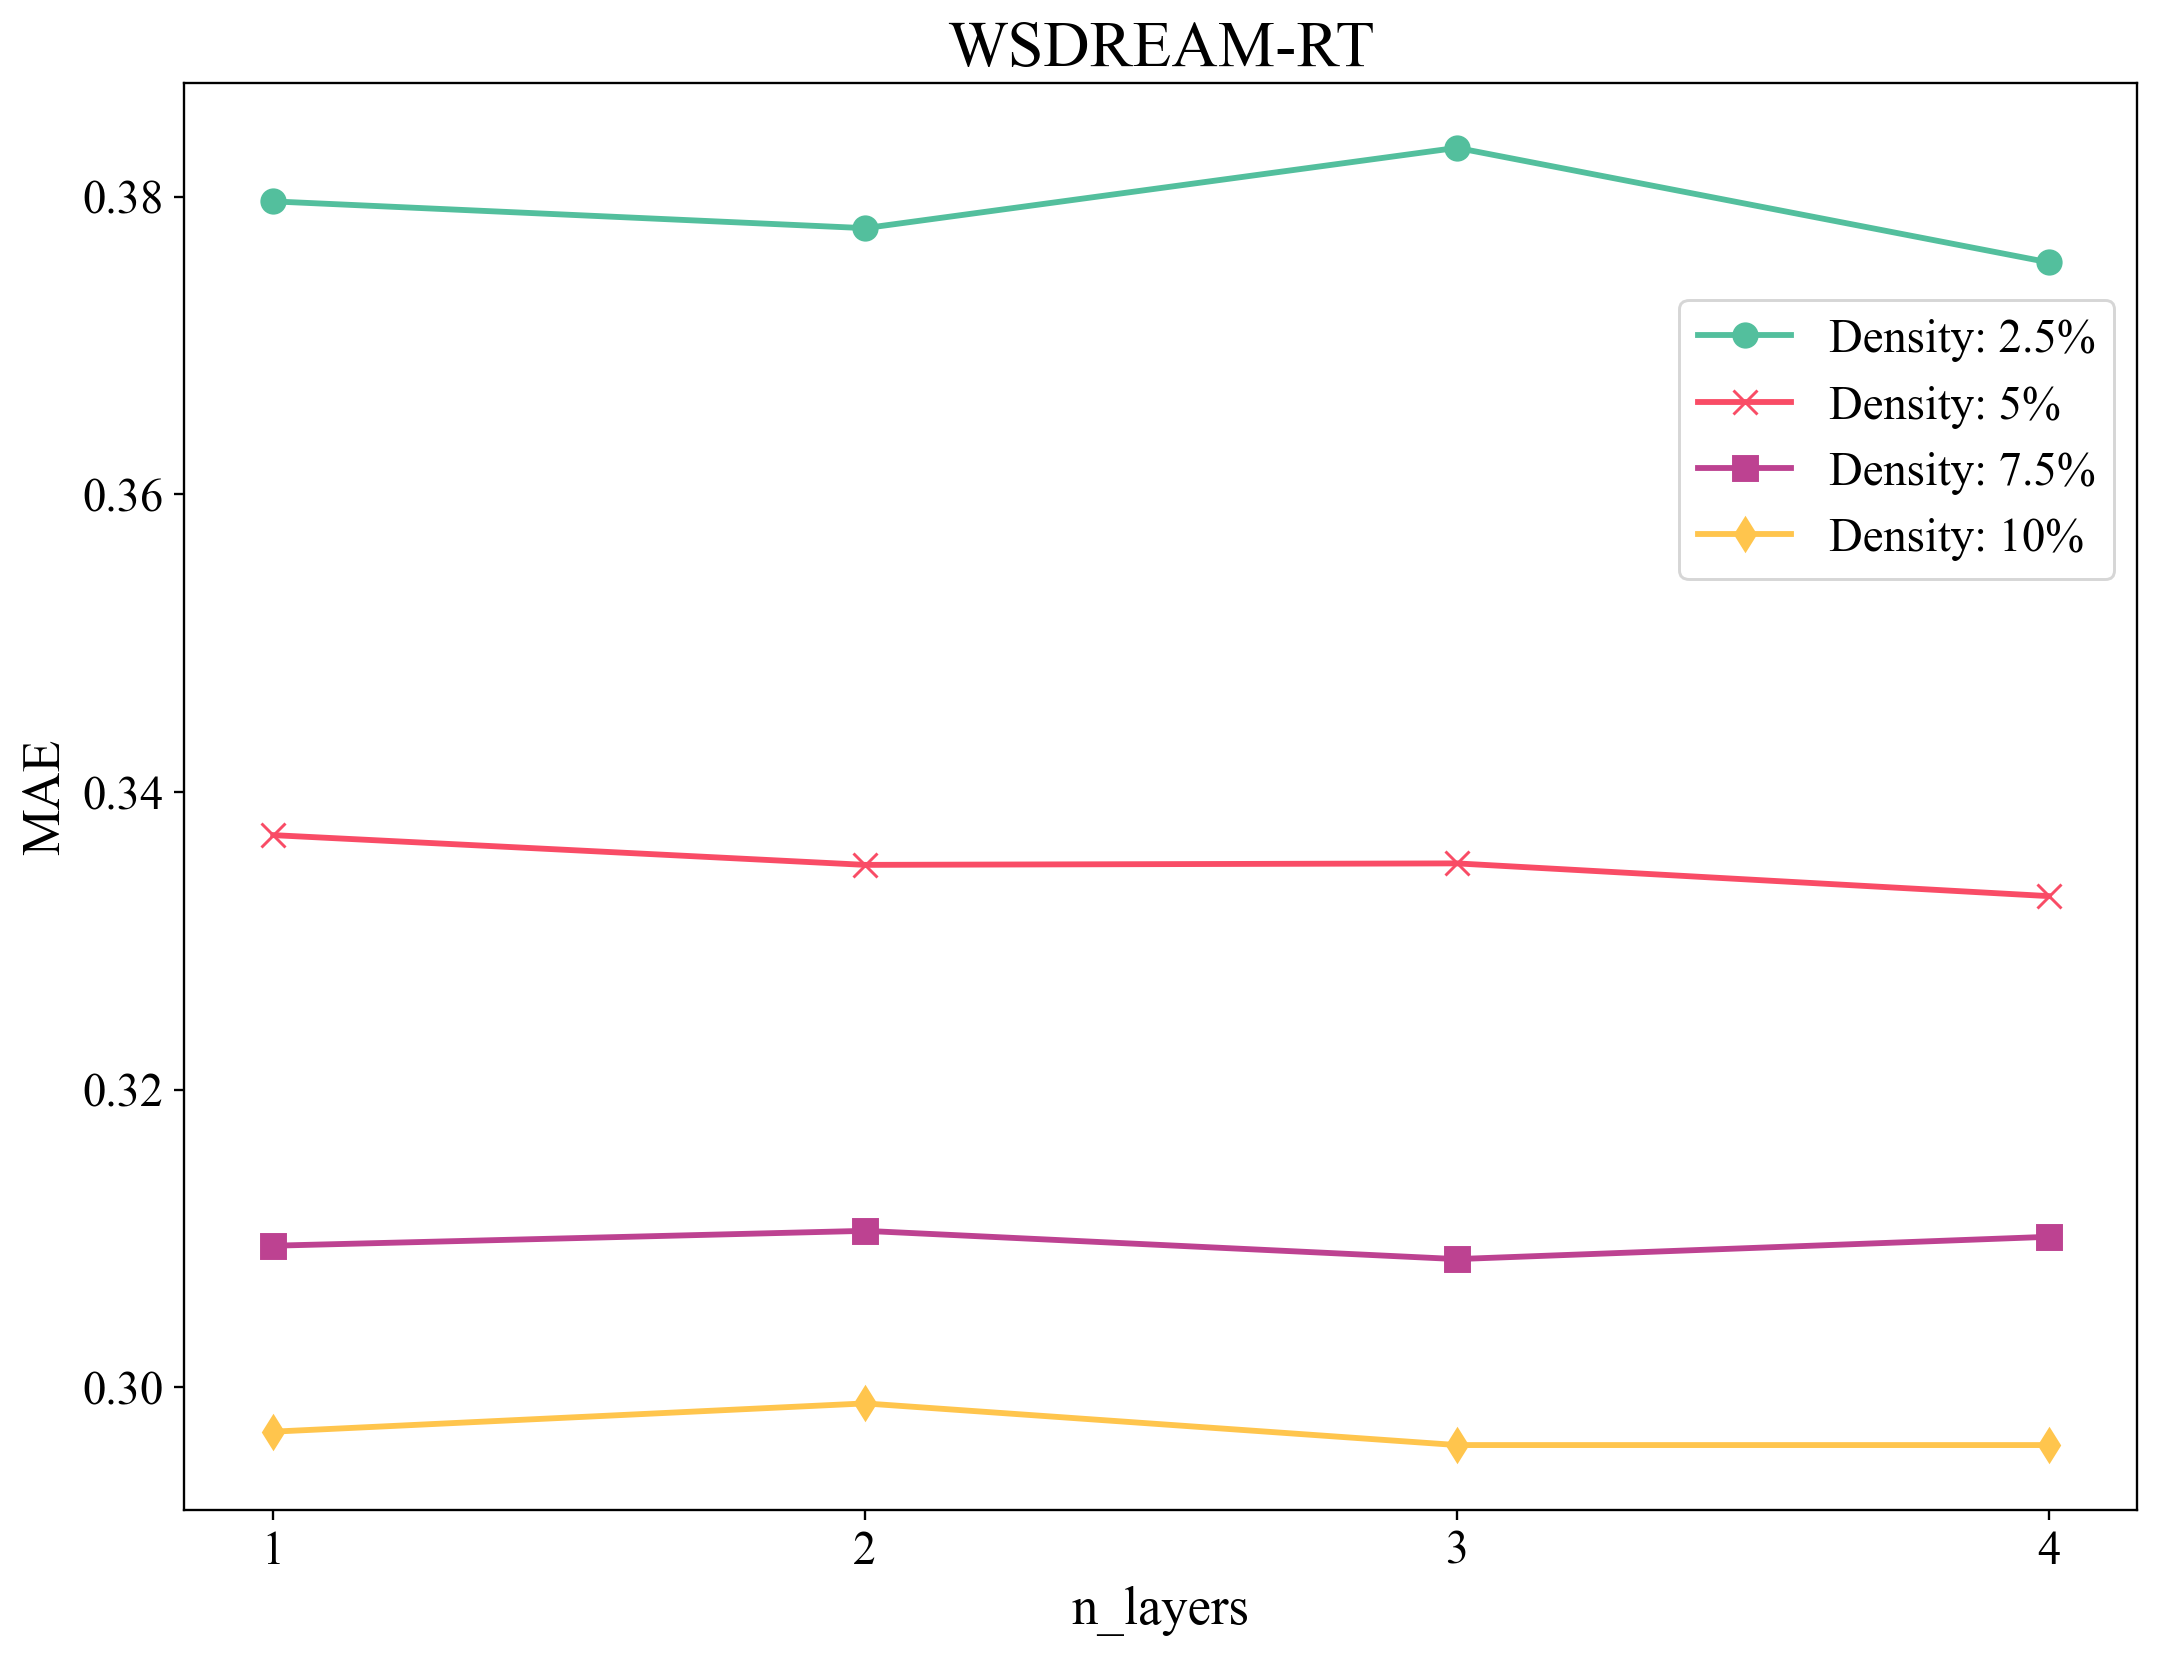

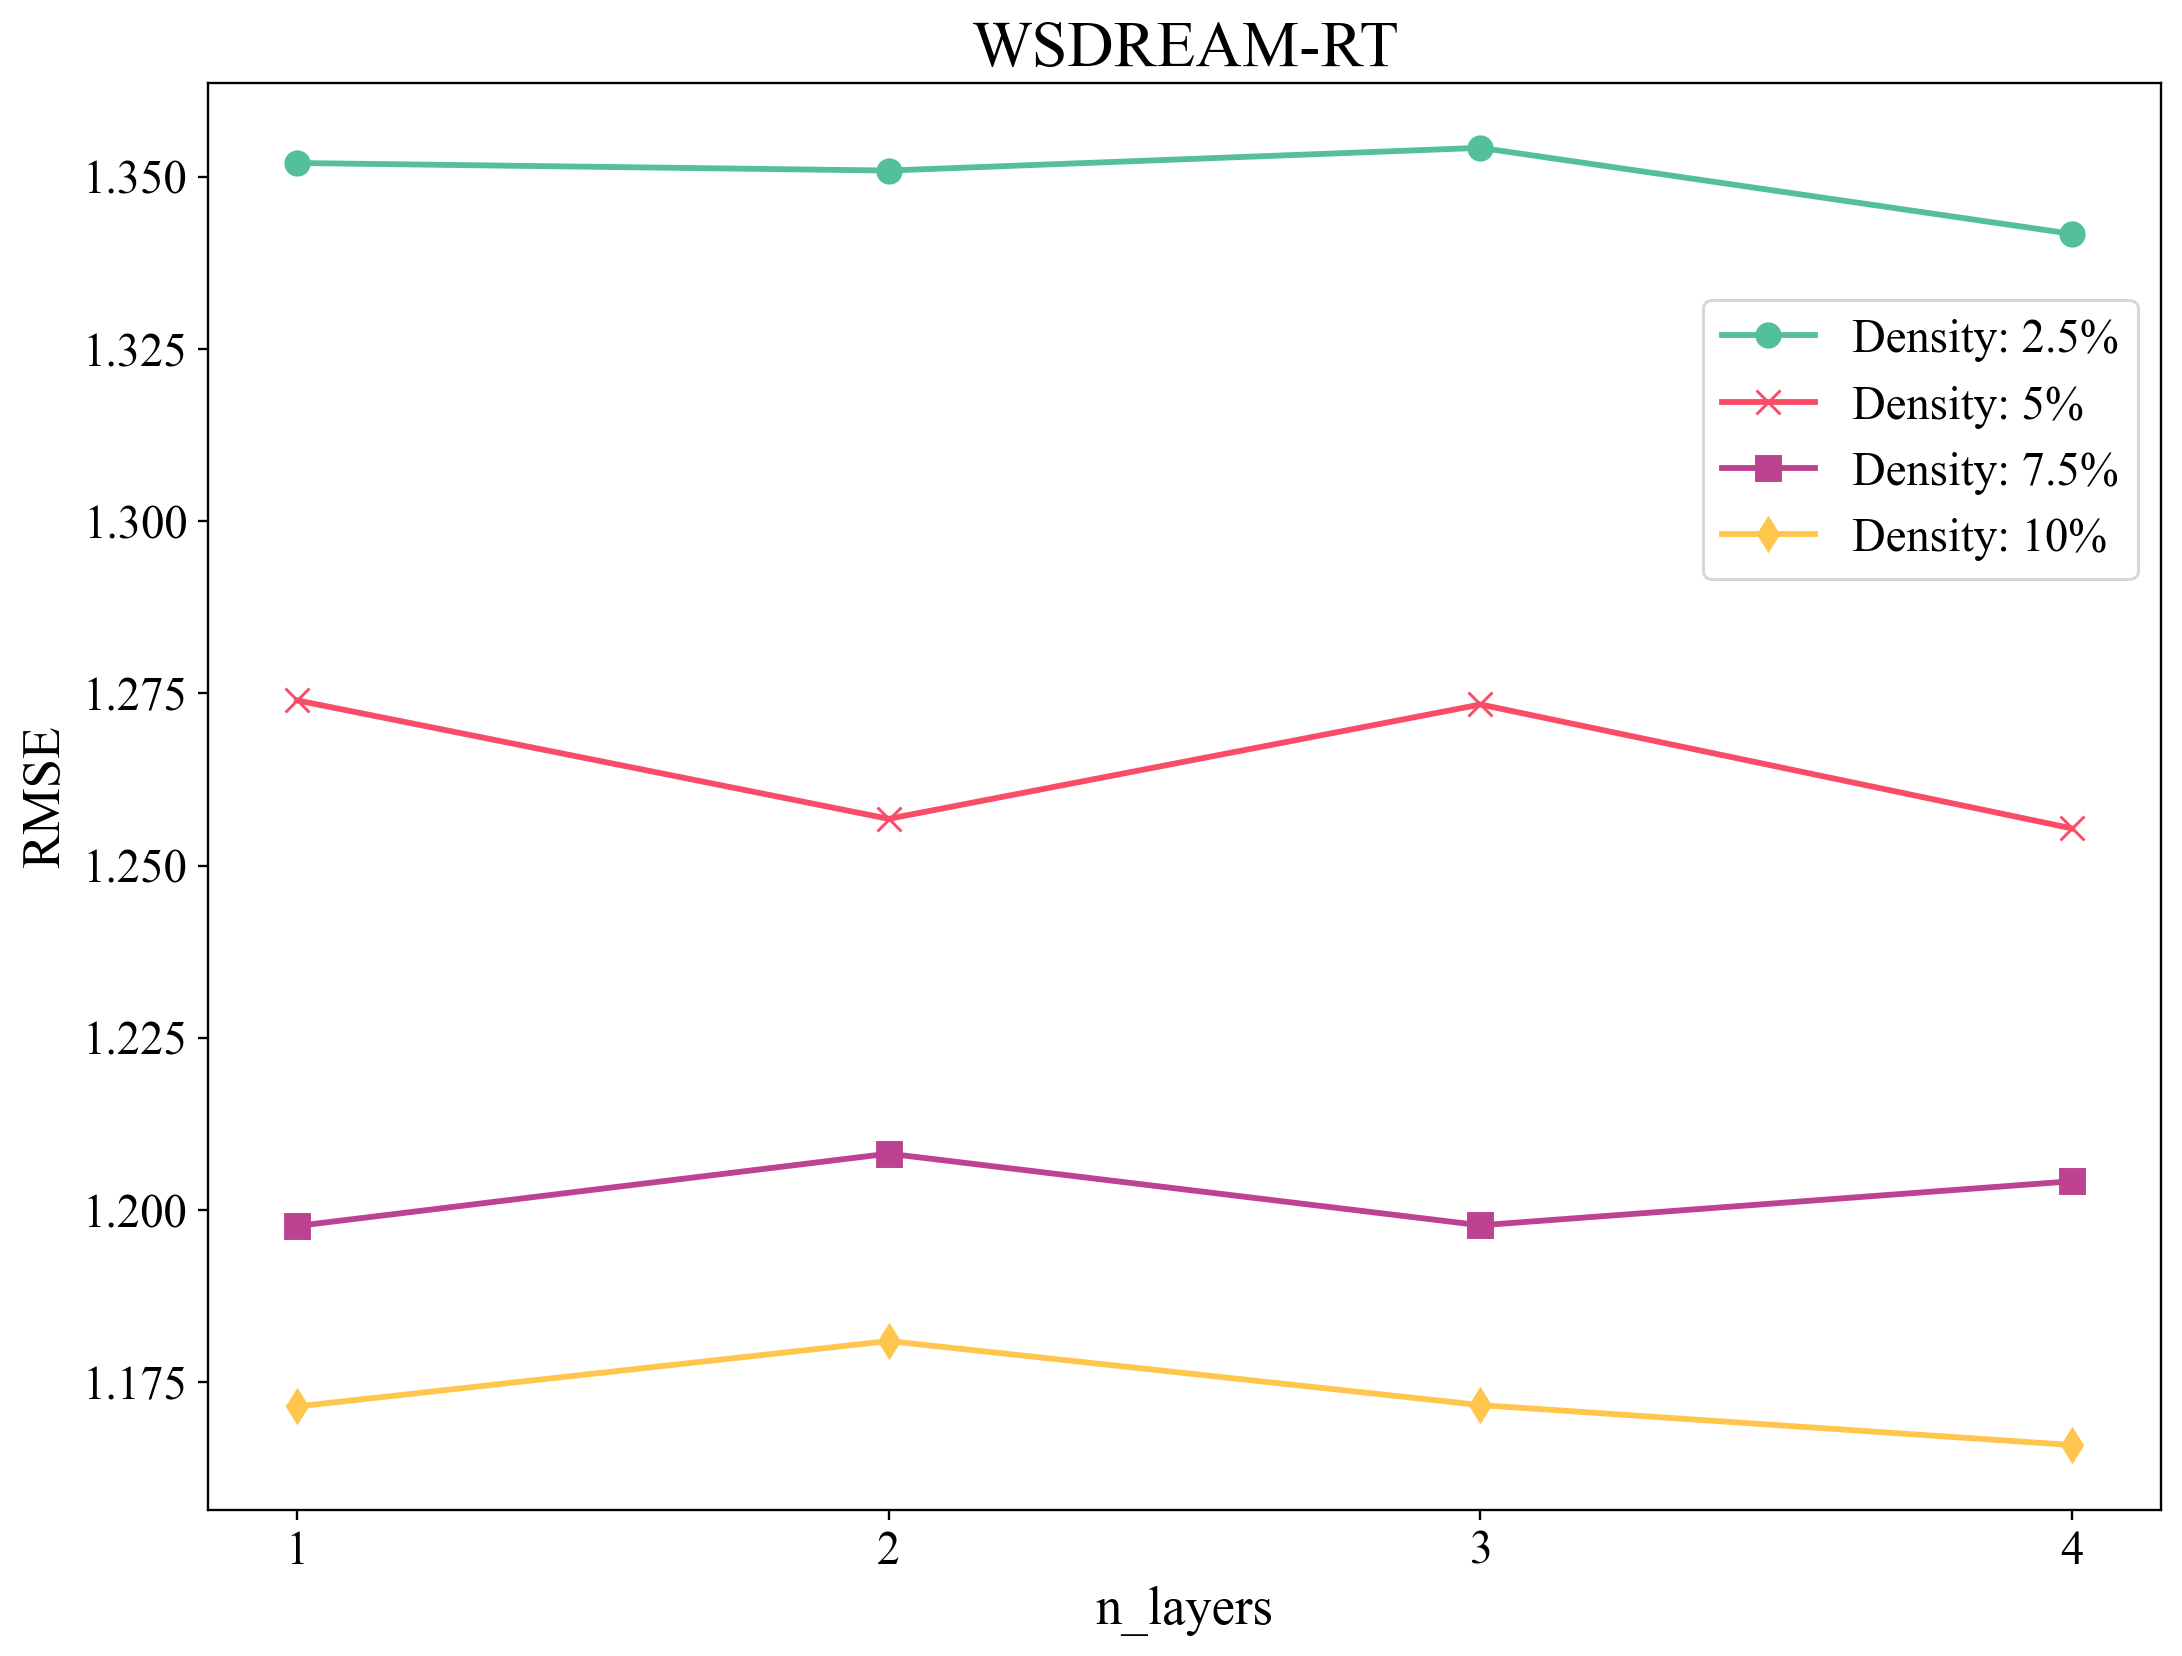

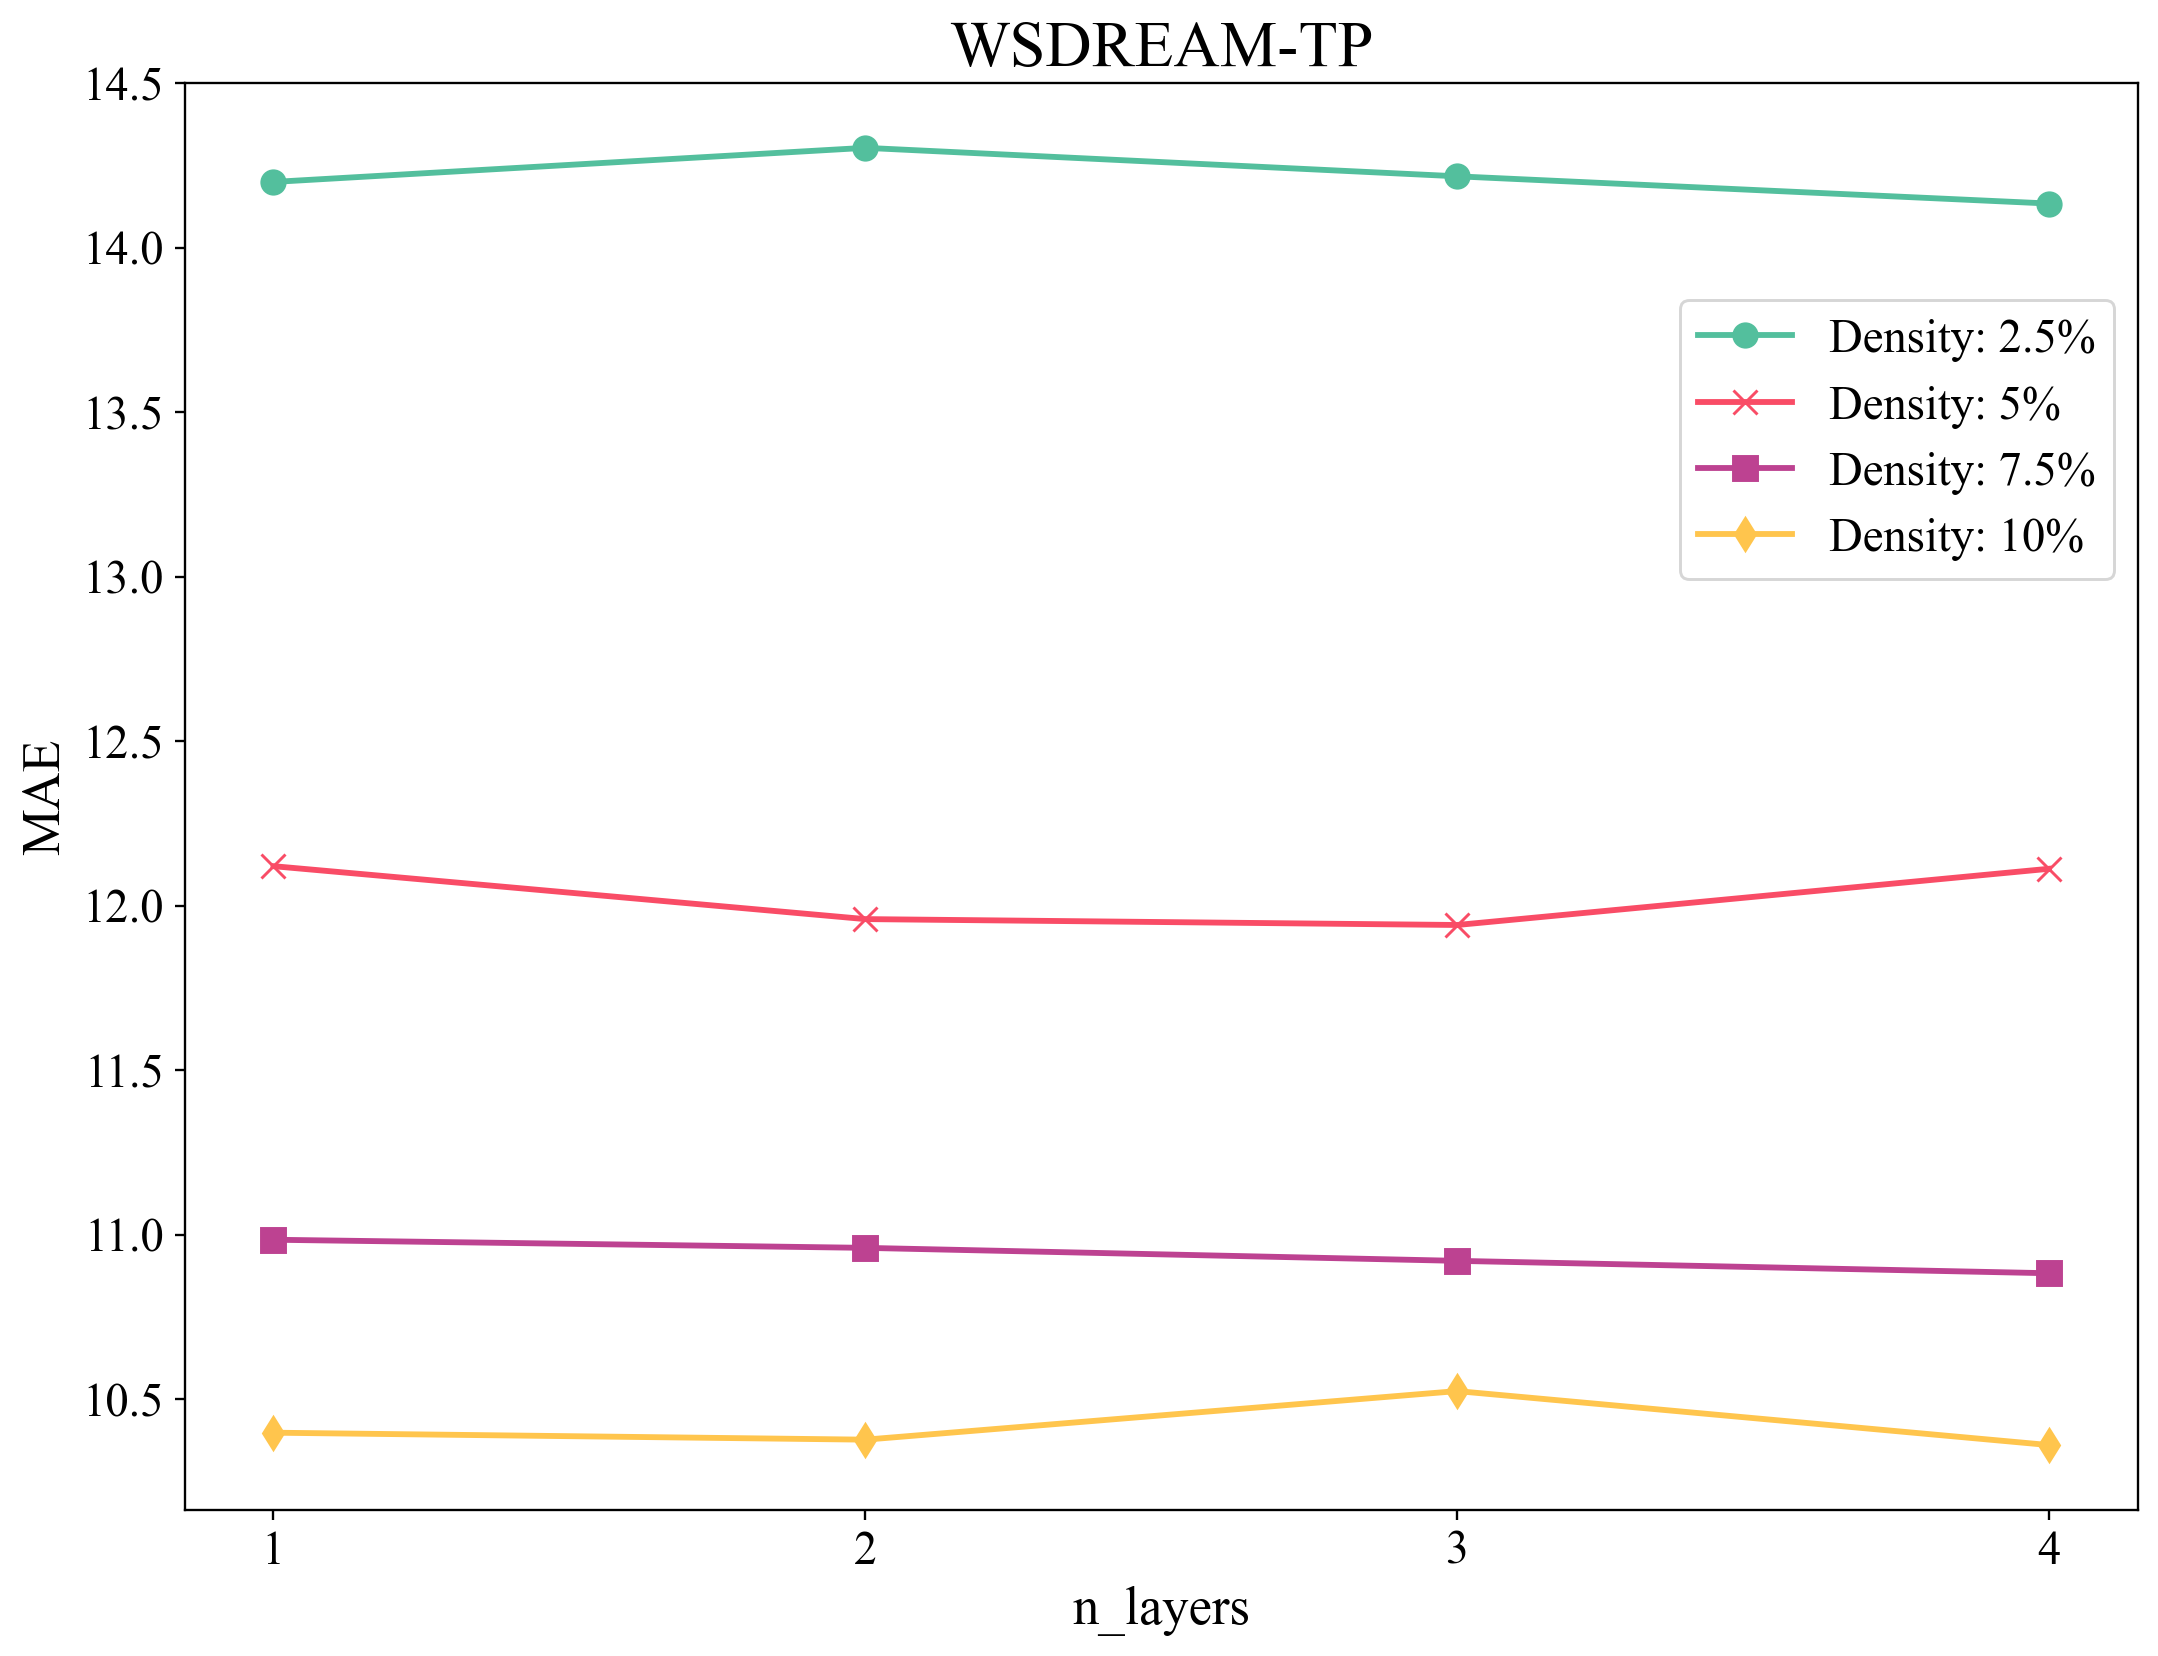

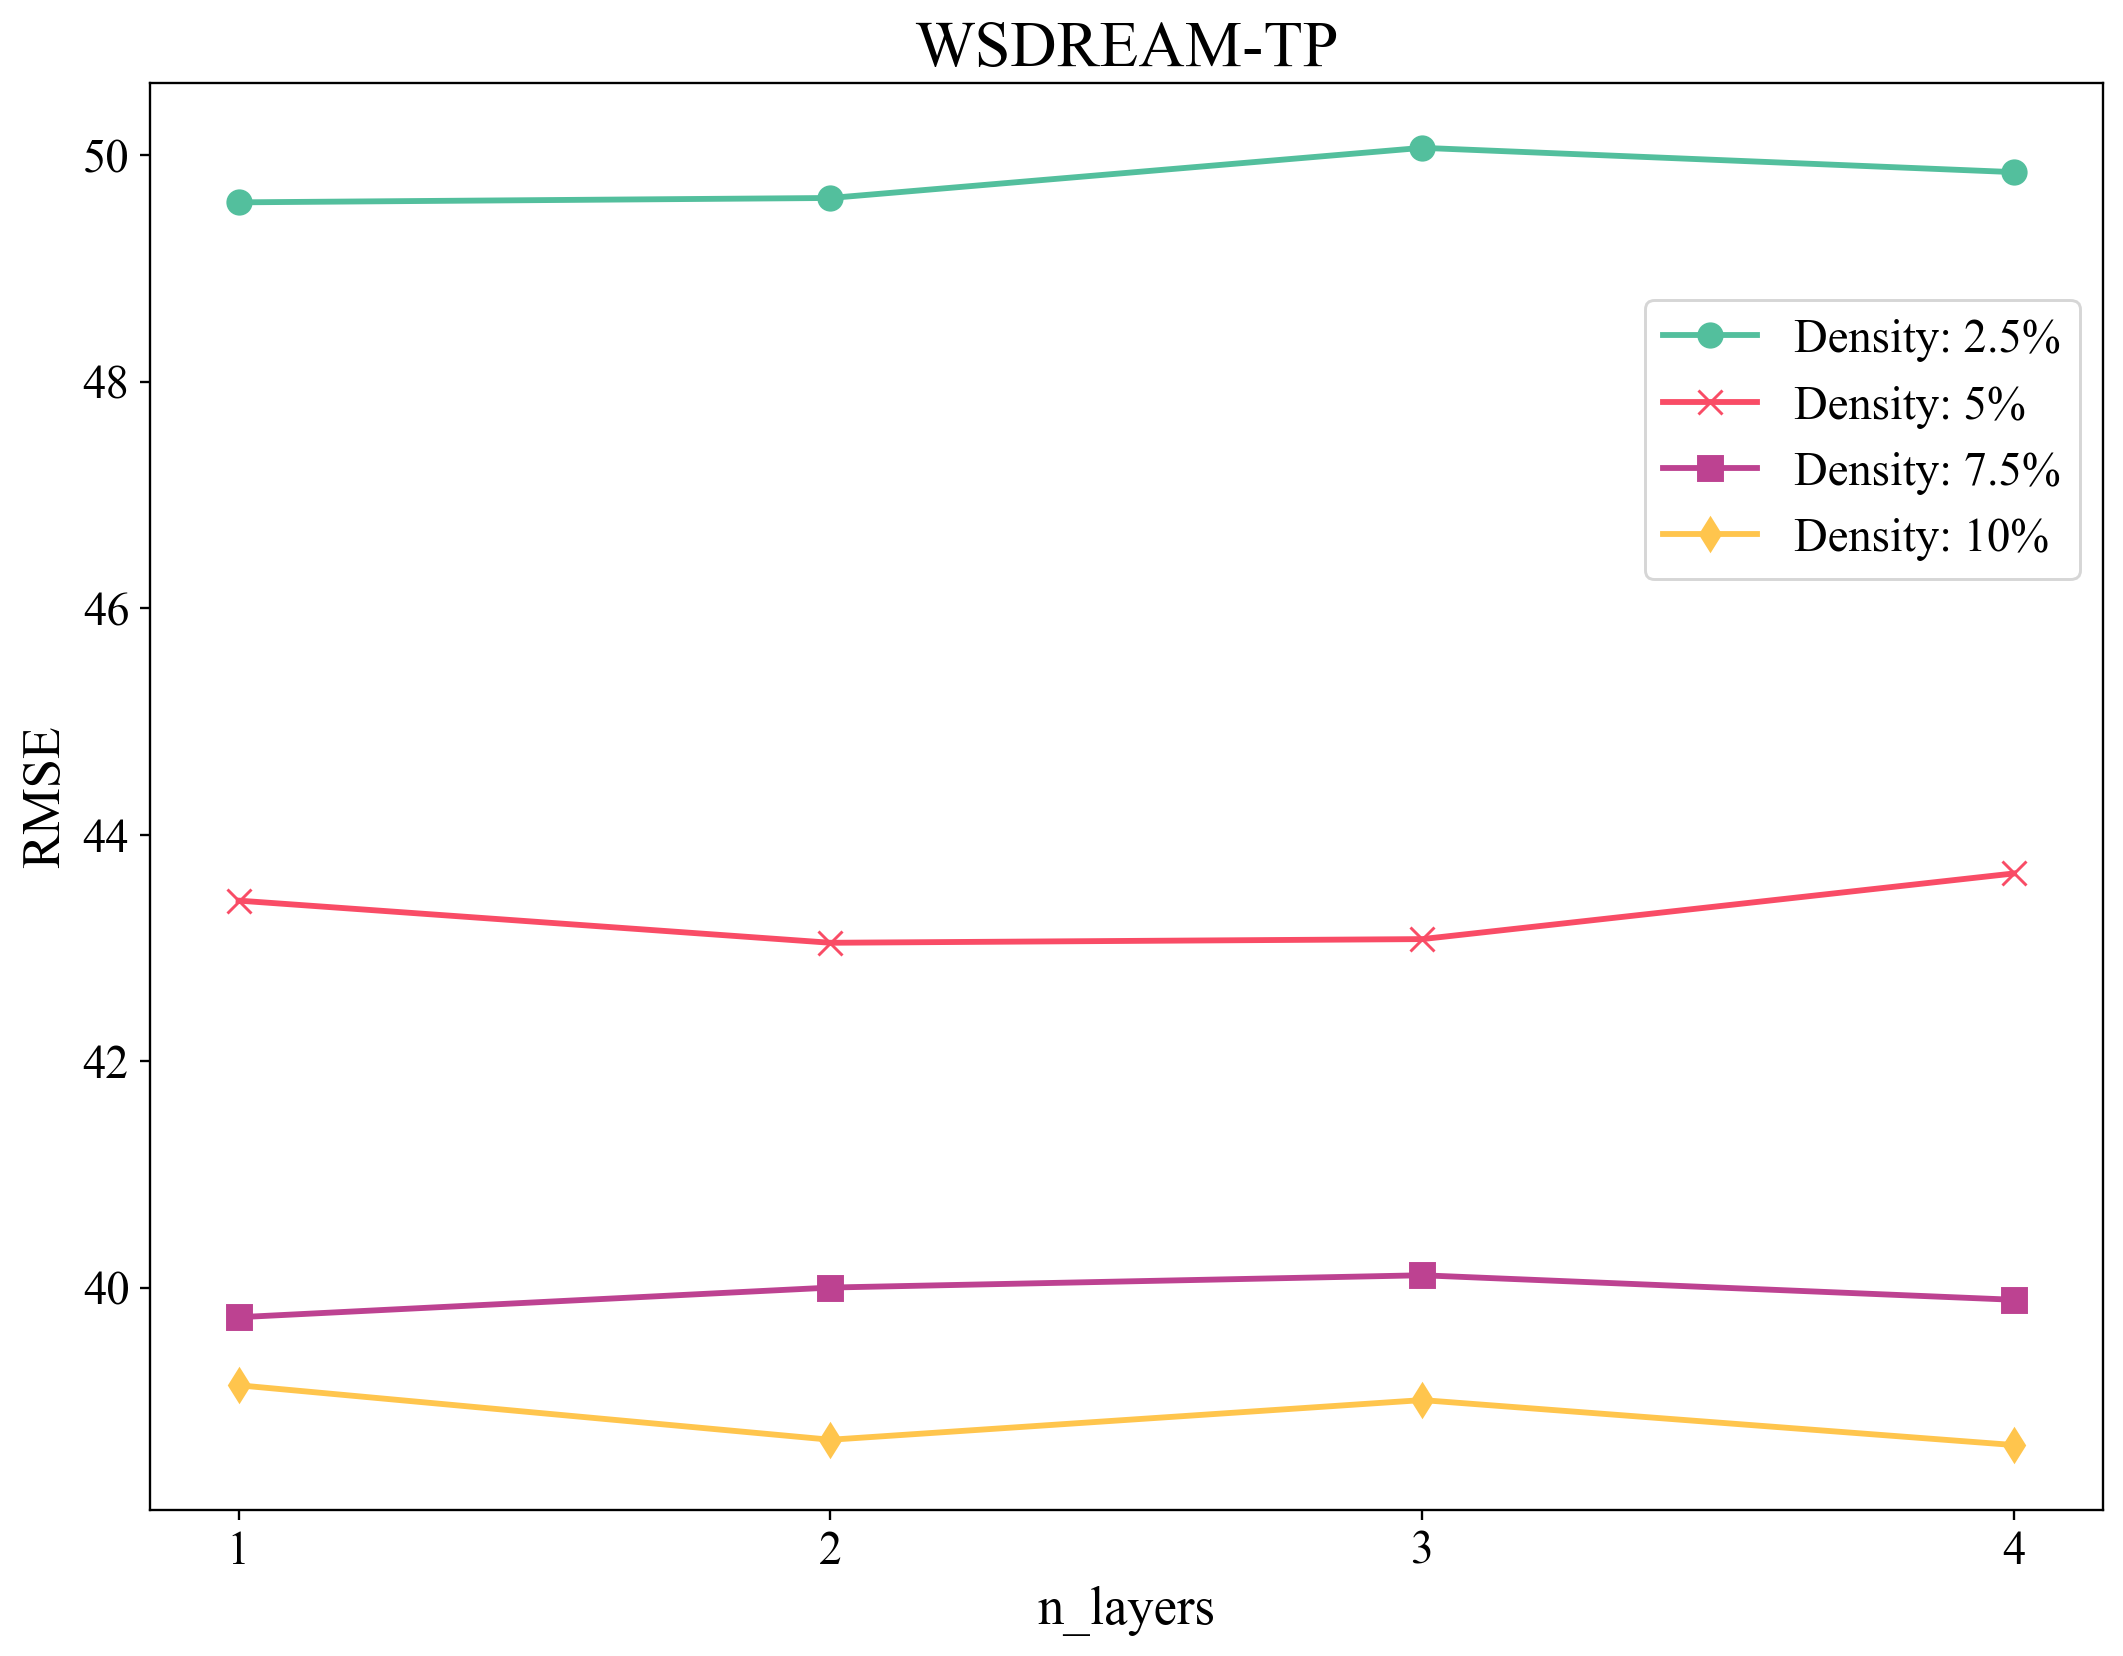

In [5]:
# layers
df = pd.read_excel("./raw/raw_n_layers.xlsx")

def gen_data_matrix(df, dataset:str, metric:str):
    df = df[(df["dataset_name"] == dataset) & (df["n_layer"].isin([1,2,3,4]))]
    df = df[["split_rate", "n_layer", metric.upper()]]
    df.groupby(["n_layer", "split_rate"]).mean()
    mat = []
    row = []
    for item in df.groupby(["n_layer", "split_rate"]).mean().itertuples():
        if not item: continue
        if item[0][0] != len(mat) + 1:
            mat.append(row[:])
            row = []
        row.append(item[1])
    mat.append(row[:])
    return mat

def draw(df, dataset, metric):
    plt.figure(figsize=(12,9), dpi=210)
    mat = np.array(gen_data_matrix(df, dataset, metric))
    marker = ["o", "x", "s", "d"]
    densitys = ["2.5%", "5%", "7.5%", "10%"]
    for layers in [1,2,3,4]:    
        x = [1,2,3,4]
        y = mat[:, layers-1]
        density = densitys[layers-1]
        plt.plot(x, y, label="Density: {}".format(density), color=COLORS[0][layers-1], marker=marker[layers-1], markersize=8, linewidth=2)
    plt.title(dataset.upper(), fontsize = LARGE_FONT_SIZE)
    plt.ylabel(metric.upper(), fontsize = MID_FONT_SIZE)
    plt.xlabel("n_layers", fontsize = MID_FONT_SIZE)
    plt.xticks([1,2,3,4], fontsize=SMALL_FONT_SIZE)
    plt.yticks(fontsize=SMALL_FONT_SIZE)
    plt.legend(loc='right', fontsize=SMALL_FONT_SIZE, bbox_to_anchor=(1, 0.75))

for dataset in ["wsdream-rt", "wsdream-tp"]:
    for metric in ["mae", "rmse"]:
        draw(df, dataset, metric)
        plt.savefig("./output/fig_n_layers_{}_{}.pdf".format(dataset, metric), bbox_inches='tight')
        plt.savefig("/Users/wenzhuo/work/科研/大论文/wenzhuo/resources/C3/fig_n_layers_{}_{}.pdf".format(dataset, metric), bbox_inches='tight')
        plt.show()
        plt.close()



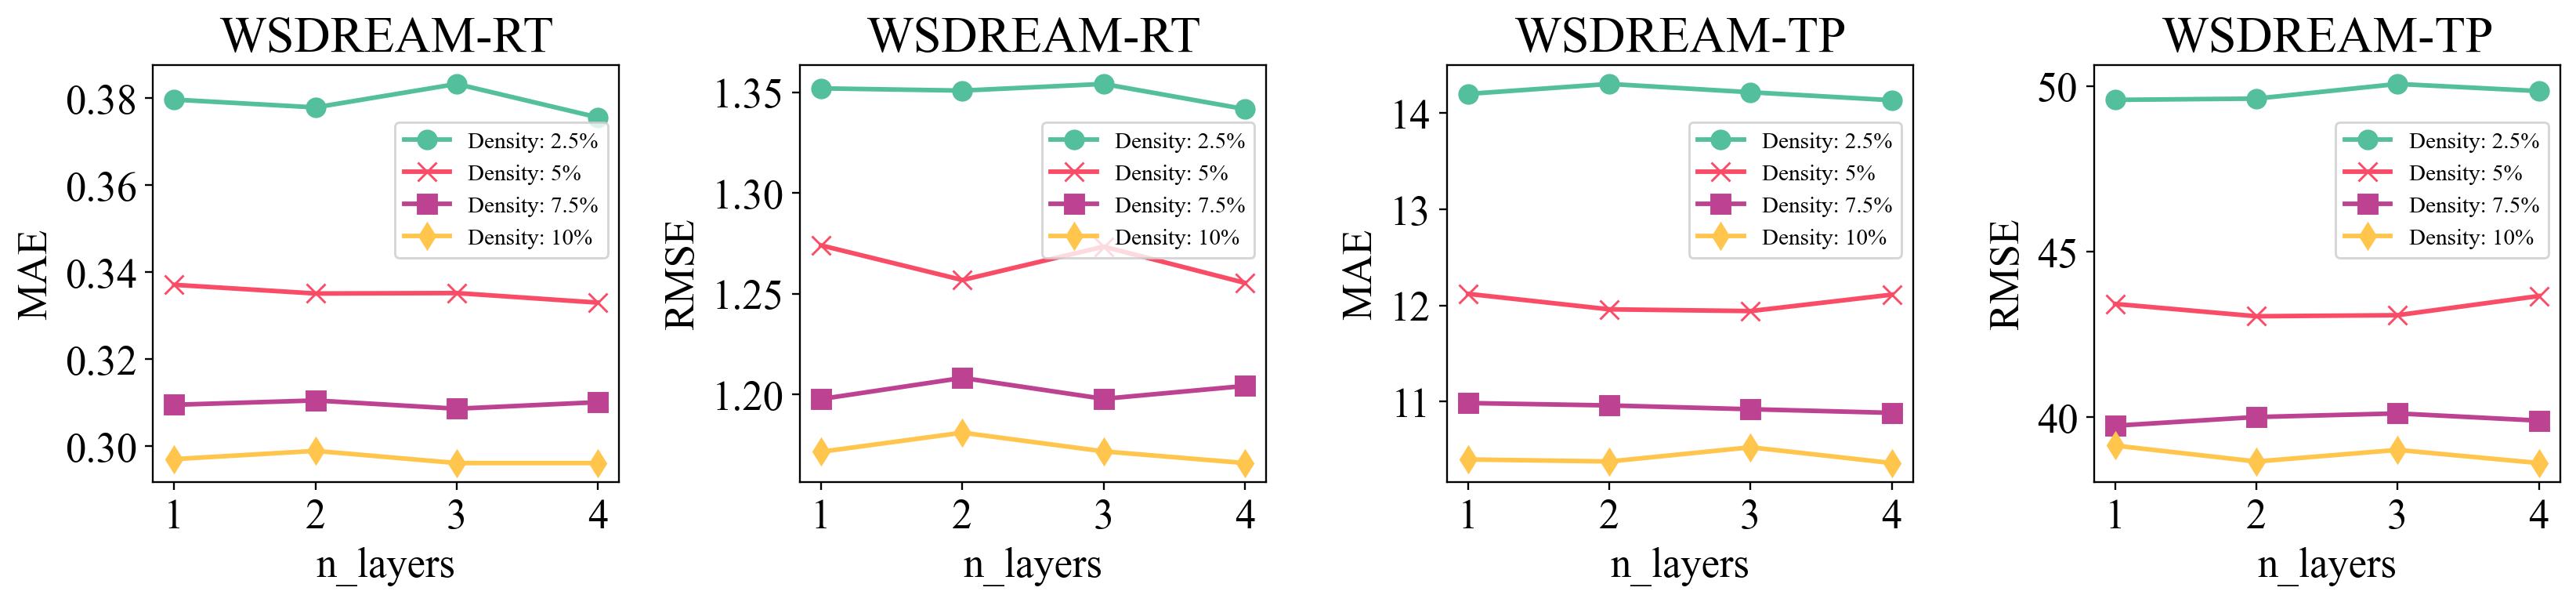

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# 假设 gen_data_matrix, df, COLORS, LARGE_FONT_SIZE, MID_FONT_SIZE, SMALL_FONT_SIZE 已定义
df = pd.read_excel("./raw/raw_n_layers.xlsx")

def draw_subplot(ax, df, dataset, metric):
    mat = np.array(gen_data_matrix(df, dataset, metric))
    marker = ["o", "x", "s", "d"]
    densitys = ["2.5%", "5%", "7.5%", "10%"]
    for layers in [1,2,3,4]:
        x = [1,2,3,4]
        y = mat[:, layers-1]
        density = densitys[layers-1]
        ax.plot(x, y, label="Density: {}".format(density), color=COLORS[0][layers-1], marker=marker[layers-1], markersize=8, linewidth=2)
    ax.set_title(dataset.upper(), fontsize = LARGE_FONT_SIZE)
    ax.set_ylabel(metric.upper(), fontsize = MID_FONT_SIZE)
    ax.set_xlabel("n_layers", fontsize = MID_FONT_SIZE)
    ax.set_xticks([1,2,3,4])
    ax.legend(loc='right', fontsize=10, bbox_to_anchor=(1, 0.7))

# 创建一个 1x4 的图表布局
fig, axs = plt.subplots(1, 4, figsize=(16,4), dpi=210)  # 调整图表大小以适应所有子图

datasets = ["wsdream-rt", "wsdream-rt", "wsdream-tp", "wsdream-tp"]
metrics = ["mae", "rmse", "mae", "rmse"]

# 遍历每个数据集和度量，绘制子图
for i, (dataset, metric) in enumerate(zip(datasets, metrics)):
    draw_subplot(axs[i], df, dataset, metric)

plt.tight_layout()
plt.savefig("./output/fig_n_layers_{}_{}_all_in_one.pdf".format(dataset, metric), bbox_inches='tight')
plt.savefig("/Users/wenzhuo/工作/科研/大论文/pics/fig_n_layers_{}_{}_all_in_one.pdf".format(dataset, metric), bbox_inches='tight')
plt.show()


#### models

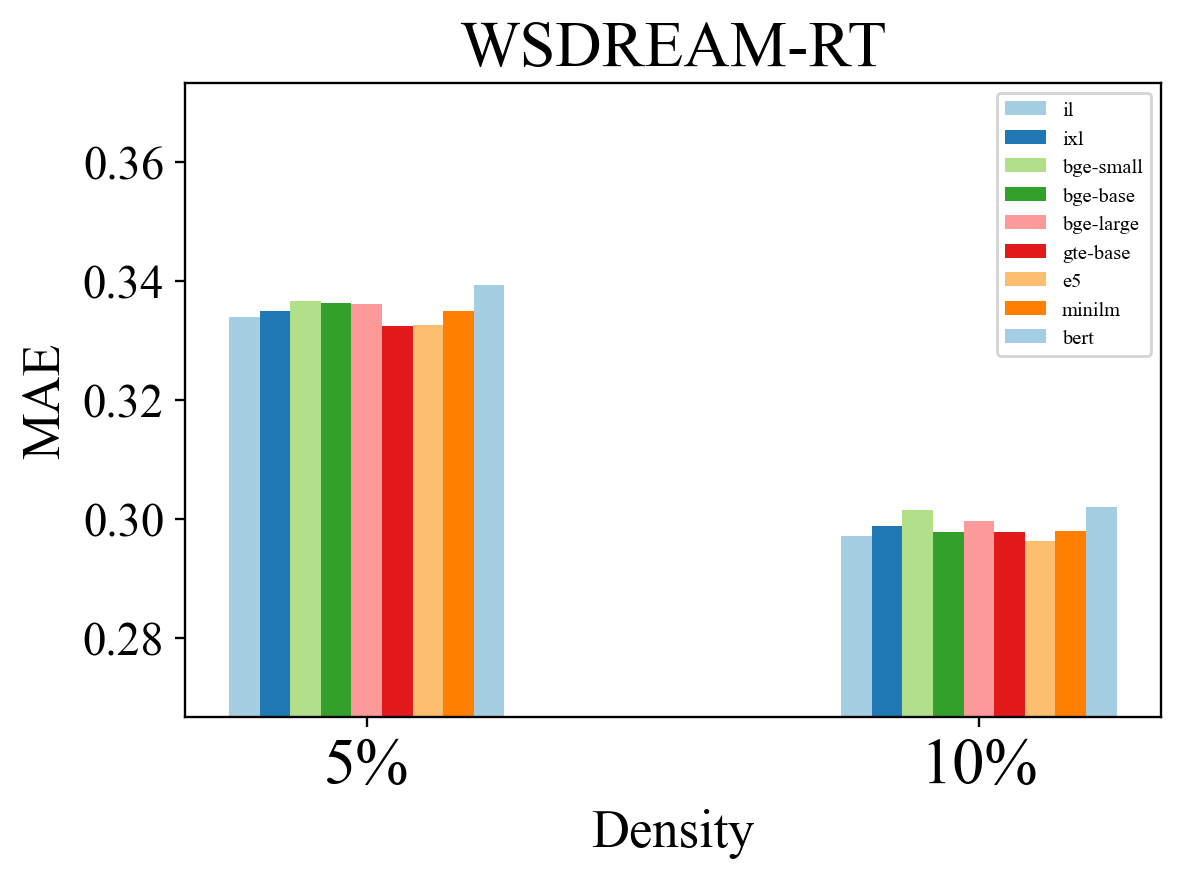

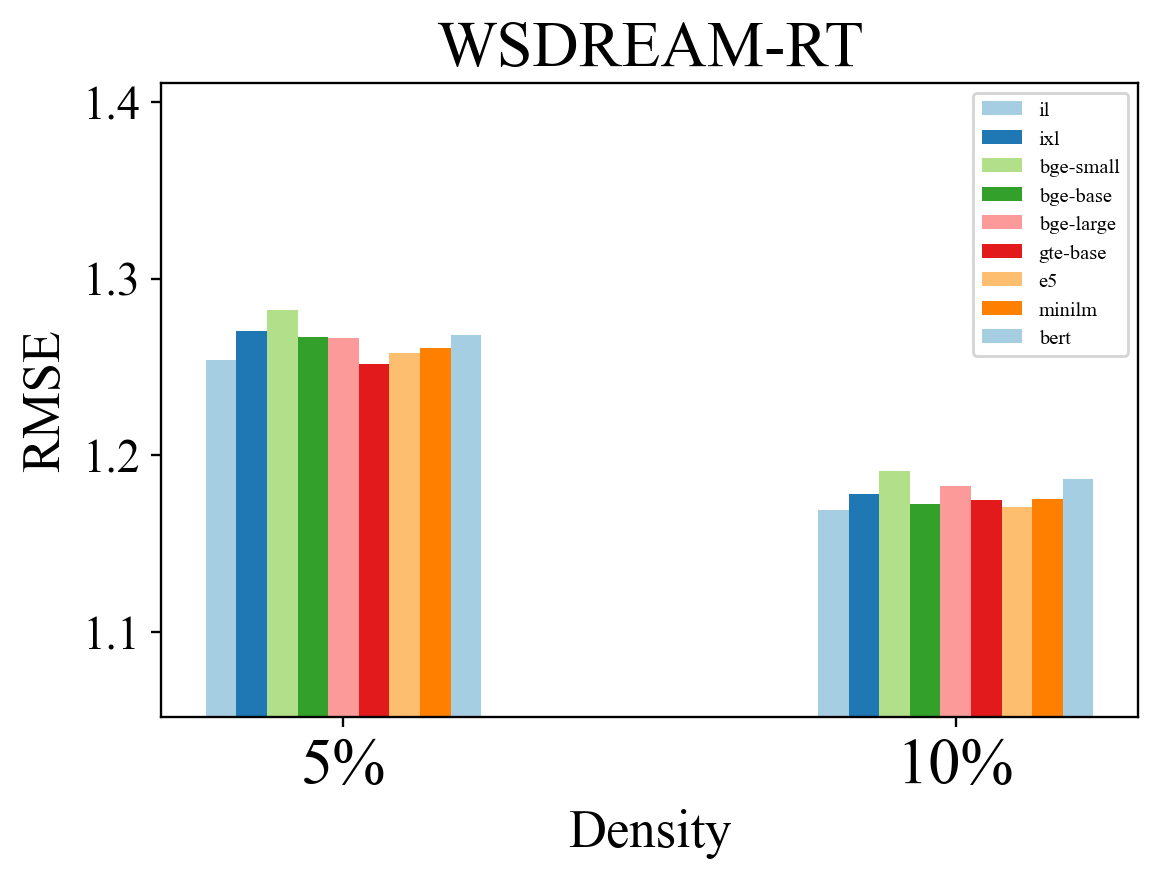

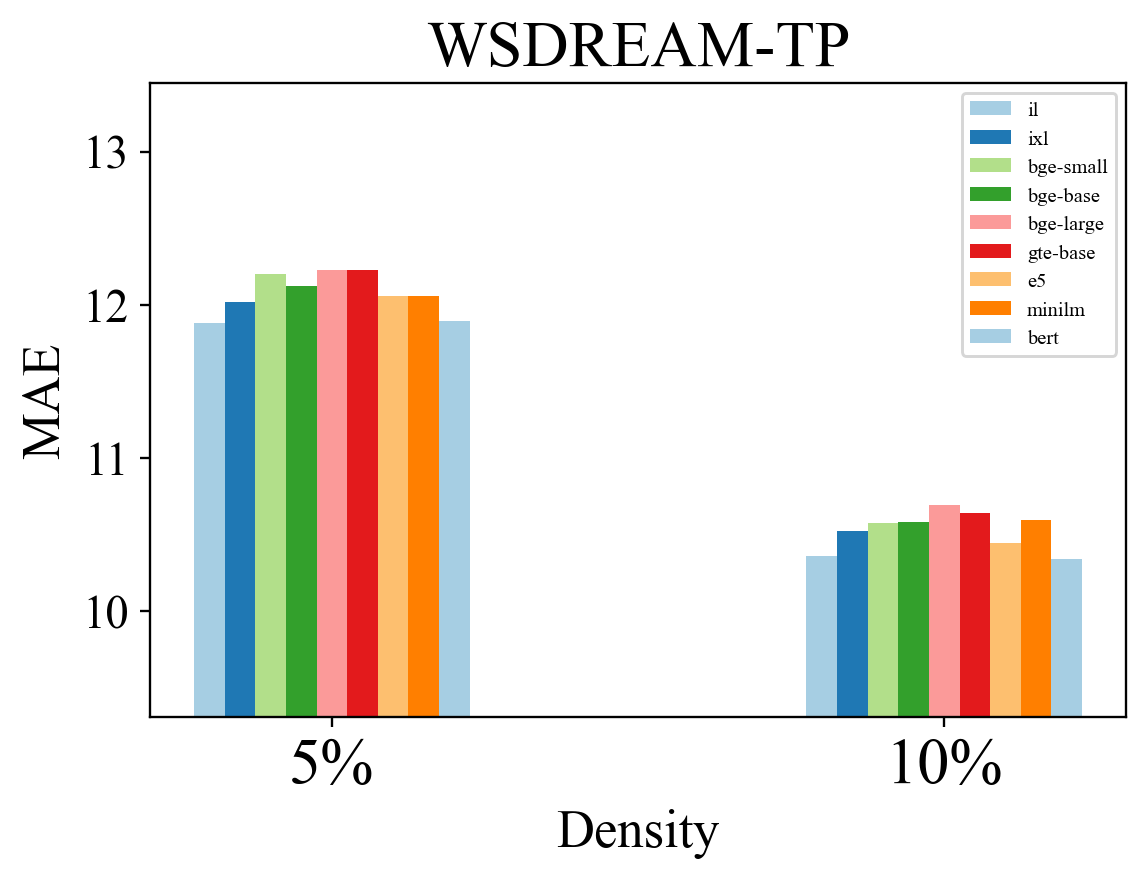

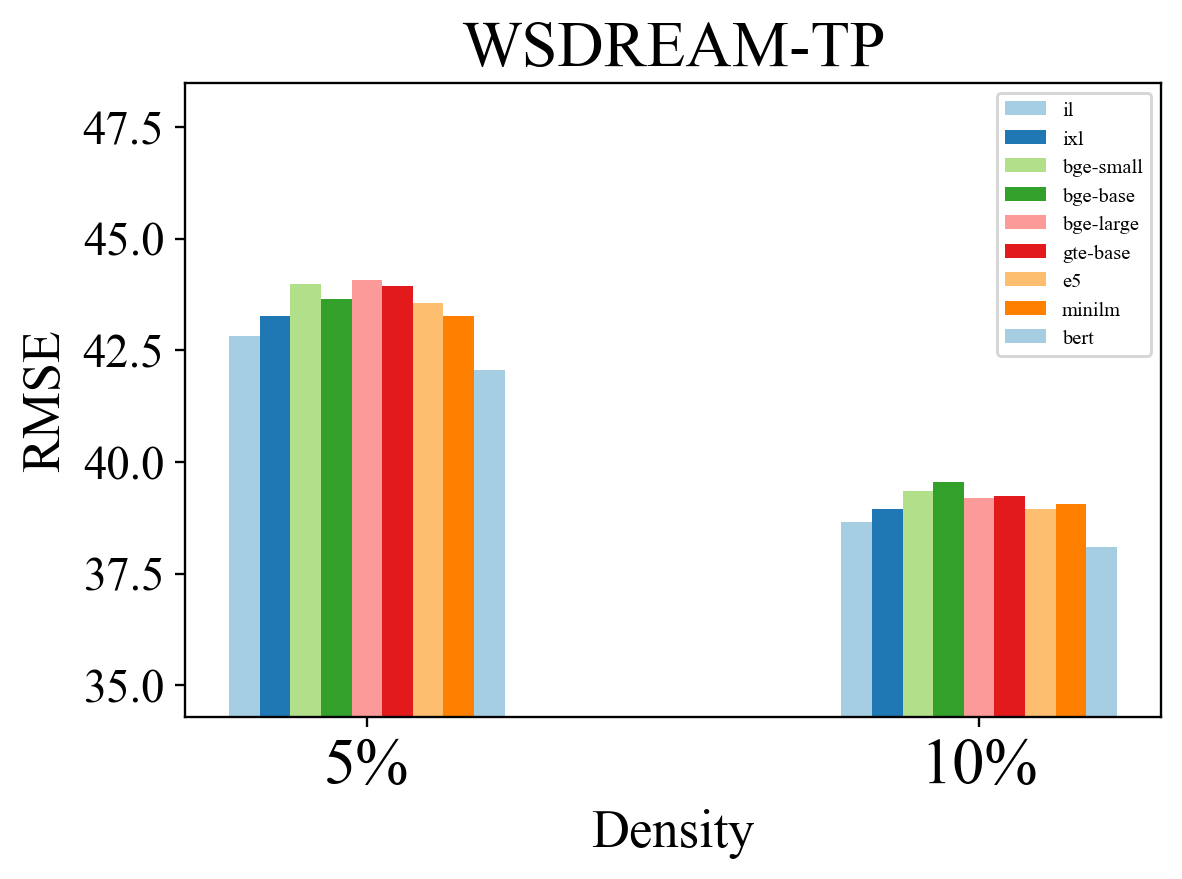

In [4]:
import brewer2mpl
from cycler import cycler

bmap = brewer2mpl.get_map('Paired', 'qualitative', 8)
# ['Accent', 'Dark2', 'Paired', 'Pastel1', 'Pastel2', 'Set1', 'Set2', 'Set3']
colors=cycler('color', bmap.mpl_colors)
plt.rcParams['axes.prop_cycle'] = colors
# colors = ["#102C57","#607274","#EEF5FF","#7FC7D9","#6DA4AA","#3D3B40","#EAD196","#EEE2DE","#F3F8FF","#93c555","#C683D7","#FCF5ED"]


df = pd.read_excel("./raw/raw_model_name.xlsx")
models = ["il", "ixl", "bge-small", "bge-base", "bge-large", "gte-base", "e5", "minilm", "bert"]
m2i = { m:i for i, m in enumerate(models)}
i2m = { i:m for i, m in enumerate(models)}
def gen_data_matrix(df, dataset:str, metric:str):
    df = df[(df["dataset_name"] == dataset)]
    df = df[["split_rate", "model_name", metric.upper()]]
    mat = [[] for i in range(len(models))]
    row = []
    for item in df.groupby(["model_name", "split_rate"]).mean().itertuples():
        if not item: continue
        index = m2i[item[0][0]]
        mat[index].append(item[1])
    return mat


def draw(df, dataset, metric):
    plt.figure(figsize=(6,4), dpi=210)
    mat = np.array(gen_data_matrix(df, dataset, metric))
    marker = ["o", "x", "s", "d"]
    densitys = ["5%", "10%"]
    
    bar_width = 0.05
    bar1 = np.arange(len(densitys))
    bars = []
    bars.append(bar1)
    for i in range(1, len(models)):
        bars.append([x + bar_width for x in bars[i-1]])
        

    max_ = max(mat[:, 0].max(), mat[:, 1].max())
    min_ = min(mat[:, 0].min(), mat[:, 1].min())
    plt.ylim(min_ * 0.9, max_ * 1.1)
        
    for idx, model in enumerate(models):
        # plt.bar(bars[idx], mat[idx], width=bar_width, label="{}".format(model), color=colors[idx], linewidth=1)
        plt.bar(bars[idx], mat[idx], width=bar_width, label="{}".format(model))

    plt.title(dataset.upper(), fontsize = LARGE_FONT_SIZE)
    plt.ylabel(metric.upper(), fontsize = MID_FONT_SIZE)
    plt.xlabel("Density", fontsize = MID_FONT_SIZE)
    plt.xticks([r + bar_width * (len(models) - 1) / 2 for r in range(len(densitys))], densitys, fontsize=LARGE_FONT_SIZE)

    plt.yticks(fontsize=SMALL_FONT_SIZE)
    plt.legend(loc='upper right', fontsize=7)

for dataset in ["wsdream-rt", "wsdream-tp"]:
    for metric in ["mae", "rmse"]:
        draw(df, dataset, metric)
        plt.savefig("./output/fig_models_{}_{}.pdf".format(dataset, metric), bbox_inches='tight')
        plt.savefig("/Users/wenzhuo/work/科研/大论文/wenzhuo/resources/C3/fig_models_{}_{}.pdf".format(dataset, metric), bbox_inches='tight')
        plt.show()
        plt.close()

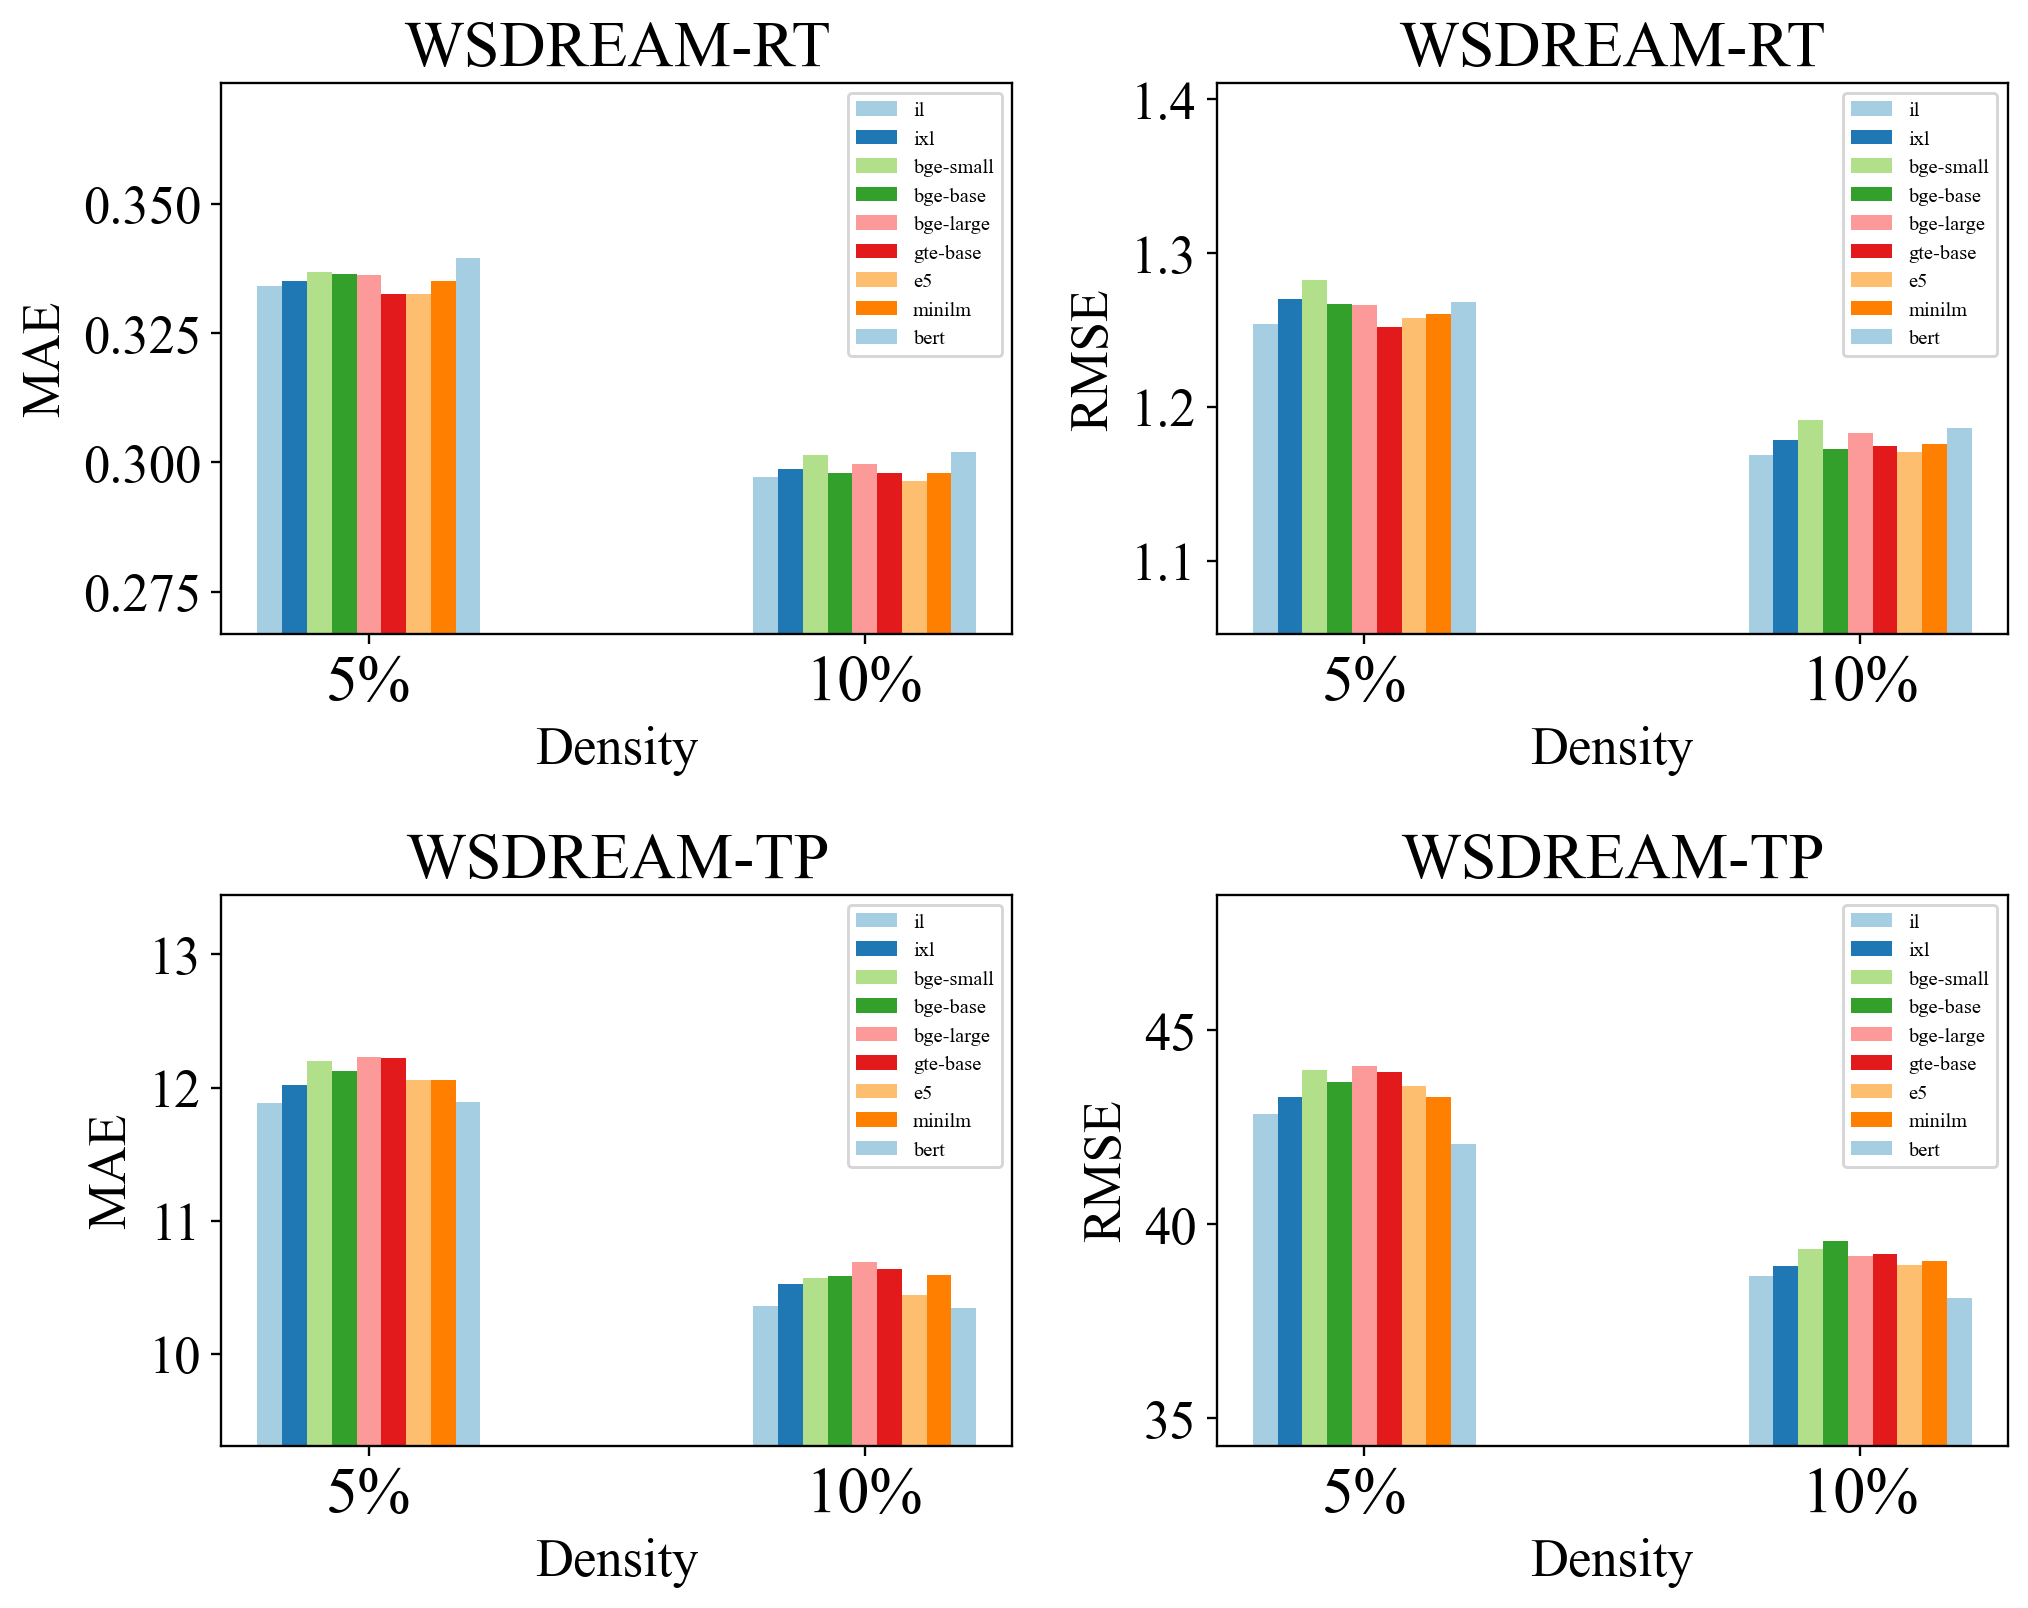

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import brewer2mpl
from cycler import cycler

# 设置颜色循环
bmap = brewer2mpl.get_map('Paired', 'qualitative', 8)
plt.rcParams['axes.prop_cycle'] = cycler('color', bmap.mpl_colors)

# 假设 df, models, m2i, i2m, gen_data_matrix, LARGE_FONT_SIZE, MID_FONT_SIZE, SMALL_FONT_SIZE 已定义

df = pd.read_excel("./raw/raw_model_name.xlsx")
models = ["il", "ixl", "bge-small", "bge-base", "bge-large", "gte-base", "e5", "minilm", "bert"]
m2i = { m:i for i, m in enumerate(models)}
i2m = { i:m for i, m in enumerate(models)}

def draw_subplot(ax, df, dataset, metric, models):
    mat = np.array(gen_data_matrix(df, dataset, metric))
    marker = ["o", "x", "s", "d"]
    densitys = ["5%", "10%"]
    
    bar_width = 0.05
    bar1 = np.arange(len(densitys))
    bars = []
    bars.append(bar1)
    for i in range(1, len(models)):
        bars.append([x + bar_width for x in bars[i-1]])

    max_ = max(mat[:, 0].max(), mat[:, 1].max())
    min_ = min(mat[:, 0].min(), mat[:, 1].min())
    ax.set_ylim(min_ * 0.9, max_ * 1.1)
        
    for idx, model in enumerate(models):
        ax.bar(bars[idx], mat[idx], width=bar_width, label="{}".format(model))

    ax.set_title(dataset.upper(), fontsize = LARGE_FONT_SIZE)
    ax.set_ylabel(metric.upper(), fontsize = MID_FONT_SIZE)
    ax.set_xlabel("Density", fontsize = MID_FONT_SIZE)
    ax.set_xticks([r + bar_width * (len(models) - 1) / 2 for r in range(len(densitys))])
    ax.set_xticklabels(densitys, fontsize=LARGE_FONT_SIZE)
    ax.legend(loc='upper right', fontsize=7)

# 创建一个子图布局
datasets = ["wsdream-rt", "wsdream-tp"]
metrics = ["mae", "rmse"]
fig, axs = plt.subplots(2, 2, figsize=(10, 8), dpi=210)  # 根据需要调整布局尺寸

# 遍历每个数据集和度量，绘制子图
for i in range(2):
    for j in range(2):
        draw_subplot(axs[i, j], df, datasets[i], metrics[j], models)

plt.tight_layout()
plt.savefig("./output/fig_models_all_in_one_row.pdf", bbox_inches='tight')
plt.savefig("/Users/wenzhuo/工作/科研/大论文/pics/fig_models_all_in_one_row.pdf", bbox_inches='tight')
plt.show()
